### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Cleaned Kaggle Essay Set

In [2]:
data = pd.read_csv("../cleaned_kaggle_essay_set.csv")
data.head()

,Essay_id,Essay_set_id,Essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspap think effect comput peopl g...,4.0,4.0,8.0
1,2,1,dear believ use comput benefit us mani way lik...,5.0,4.0,9.0
2,3,1,dear peopl use comput everyon agre benefit soc...,4.0,3.0,7.0
3,4,1,dear local newspap found mani expert say compu...,5.0,5.0,10.0
4,5,1,dear know comput posit effect people. comput c...,4.0,4.0,8.0


### Normalizing Essay Set's 1, 7, 8

In [3]:
normalized_score = np.zeros(shape=(len(data), 1))
for id in [1, 7, 8]:
    max_score = max(data[data["Essay_set_id"] == id]["domain1_score"])
    min_score = min(data[data["Essay_set_id"] == id]["domain1_score"])
    for idx, row in data.iterrows():
        if row["Essay_set_id"] == id:
            normalized_score[idx] = (row["domain1_score"] - min_score) / (max_score - min_score)
data["normalized_score"] = normalized_score
data.head()

,Essay_id,Essay_set_id,Essay,rater1_domain1,rater2_domain1,domain1_score,normalized_score
0,1,1,dear local newspap think effect comput peopl g...,4.0,4.0,8.0,0.6
1,2,1,dear believ use comput benefit us mani way lik...,5.0,4.0,9.0,0.7
2,3,1,dear peopl use comput everyon agre benefit soc...,4.0,3.0,7.0,0.5
3,4,1,dear local newspap found mani expert say compu...,5.0,5.0,10.0,0.8
4,5,1,dear know comput posit effect people. comput c...,4.0,4.0,8.0,0.6


### Visualizing Normalized Scores

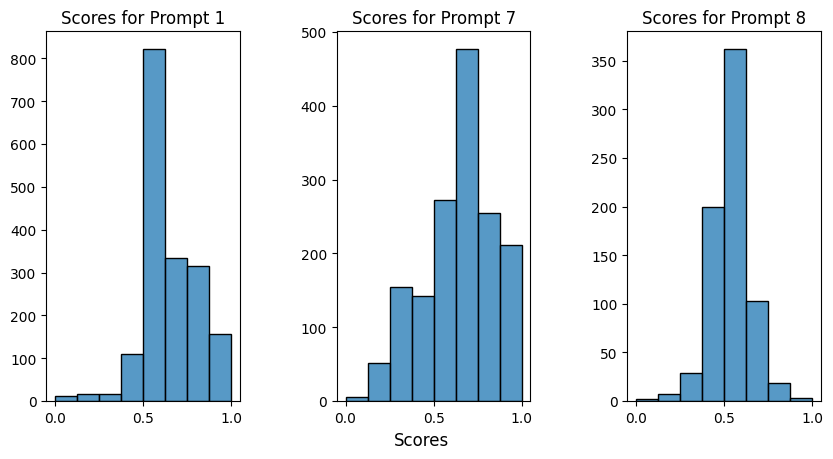

In [4]:
fig, ax = plt.subplots(1, 3, sharex=True)
sns.histplot(data[data["Essay_set_id"] == 1]["normalized_score"], bins=8, ax=ax[0])
sns.histplot(data[data["Essay_set_id"] == 7]["normalized_score"], bins=8, ax=ax[1])
sns.histplot(data[data["Essay_set_id"] == 8]["normalized_score"], bins=8, ax=ax[2])

ax[0].set_title("Scores for Prompt 1")
ax[1].set_title("Scores for Prompt 7")
ax[2].set_title("Scores for Prompt 8")

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None) 

fig.supxlabel("Scores")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_figwidth(10)
plt.show()

### Exporting Data

In [5]:
data.to_csv("normalized_prompt_1_7_8.csv")